In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd "~/dropbox"

/Users/agrimabahl/Dropbox


In [3]:

import math
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
tr = scipy.io.loadmat('housing_data.mat')


In [4]:
cd "~/dropbox"

/Users/agrimabahl/Dropbox


In [5]:
train=tr["Xtrain"]
train_labels=tr["Ytrain"]
test=tr["Xvalidate"]
validate_labels=tr["Yvalidate"]

In [6]:
train_label=[0]*len(train_labels)
validate_label=[0]*len(validate_labels)


In [7]:
#flatten train labels
for i in range(0,len(train_labels)):
    train_label[i]=tr["Ytrain"][i][0]

In [8]:
#flatten validate labels
for i in range(0,len(validate_labels)):
    validate_label[i]=tr["Yvalidate"][i][0]

In [8]:
alpha=mean(train_label)

In [10]:
train=np.insert(train, 8, 1, axis=1)

In [18]:
lambda_1=0.2


In [19]:
pseudo_inv=np.linalg.inv(train.transpose().dot(train)+lambda_1*np.identity(9))

In [20]:
w=pseudo_inv.dot(train.transpose()).dot(train_label)

In [23]:
y_bar=test.dot(np.matrix(w).transpose())

In [13]:
w = w.reshape((8,1))    # b.shape  = (3,1)


In [52]:
y_bar.shape

(1200, 1)

In [24]:
rss=np.sum((y_bar-validate_label)**2)


<function matplotlib.pyplot.show>

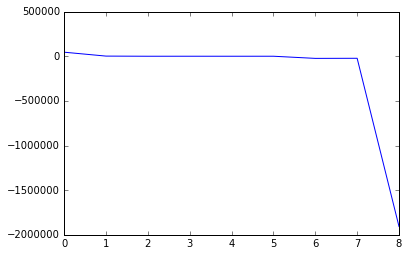

In [25]:
plt.plot([0,1,2,3,4,5,6,7,8],[w[0],w[1],w[2],w[3],w[4],w[5],w[6],w[7],w[8]])
plt.show

In [16]:
#Cross-Validation
folds = 10
subset_size = int(len(consolidated)/folds)

In [23]:
#Cross-validation

for i in range(0,10):
    validation = consolidated[i*subset_size:(i+1)*subset_size]
    labelv = consolidated_labels[i*subset_size:(i+1)*subset_size]
    training = np.concatenate((consolidated[:i*subset_size],consolidated[(i+1)*subset_size:]))
    labelt = np.concatenate((consolidated_labels[:i*subset_size],consolidated_labels[(i+1)*subset_size:]))
    lambda_1=pow(0.2,i-5)
    pseudo_inv=np.linalg.inv(training.transpose().dot(training)+lambda_1*np.identity(9))
    w=pseudo_inv.dot(training.transpose()).dot(labelt)
    w = w.reshape((9,1))
    X=training.dot(w)-labelt
    #loss_function=X.transpose().dot(X)+lamda_1*w.transpose().dot(w)
    y_bar=validation.dot(np.matrix(w))
    rss=np.sum((y_bar-labelv)**2)
    print (rss)
    #print(loss_function)

-5.42742112949e+19
-5.88160140118e+19
-5.30068756106e+19
-6.67819661207e+19
-7.00321162011e+19
-7.23728978127e+19
-7.04949188338e+19
-7.16824115675e+19
-6.98590124794e+19
-7.70436490944e+19


In [15]:
consolidated=np.concatenate((train, test), axis=0)
consolidated_labels=np.concatenate((train_label, validate_label), axis=0)

In [29]:
train.shape
train_labels=tr["Ytrain"]
test=tr["Xvalidate"]
validate_labels=tr["Yvalidate"]

In [28]:
consolidated.shape

(20640, 8)

In [28]:
#Pre-proccesing
for i in range(len(consolidated)):
    m=mean(consolidated[i])
    consolidated[i]=consolidated[i]-m

In [33]:
len(test[0])

8

In [13]:
test=np.insert(test, 8, 1, axis=1)

In [35]:
train.shape

(19440, 10)

In [12]:
for i in range(len(test)):
    m=mean(test[i])
    test[i]=test[i]-m

In [49]:
validate_label

[125900,
 73800,
 152100,
 500001,
 316700,
 298400,
 133300,
 57500,
 154000,
 87700,
 45500,
 53500,
 445700,
 188500,
 447400,
 252200,
 183300,
 91500,
 280600,
 157700,
 272200,
 199800,
 500001,
 147400,
 126500,
 422900,
 261400,
 279600,
 72300,
 79700,
 250000,
 265900,
 68200,
 126500,
 352400,
 294000,
 500001,
 58200,
 394600,
 291000,
 500001,
 245100,
 91200,
 133500,
 500001,
 273900,
 239300,
 65200,
 84200,
 209900,
 157500,
 342700,
 243800,
 193800,
 180900,
 137000,
 172100,
 92600,
 170300,
 230600,
 214700,
 352400,
 337000,
 350000,
 216100,
 60000,
 61800,
 96800,
 151400,
 144000,
 261000,
 258300,
 58800,
 257000,
 85400,
 201200,
 88700,
 70300,
 251000,
 187500,
 126200,
 500001,
 163300,
 208000,
 235400,
 288100,
 111900,
 346200,
 70500,
 216700,
 180700,
 234900,
 231200,
 256000,
 108300,
 251700,
 500001,
 121900,
 500001,
 150500,
 225000,
 134500,
 228200,
 500000,
 163900,
 253100,
 355000,
 153100,
 500001,
 124600,
 290800,
 185100,
 245800,
 5000

In [65]:
train[0]

array([-231.0576625, -201.9817625,  849.0182375,  -45.9817625,
        237.0182375,  -55.9817625, -195.9417625, -355.0917625,    1.       ])

In [26]:
rss

-1.5262667351972827e+19

In [ ]:
X.transpose().dot(X)+0.2*w.transpose().dot(w)

In [32]:
X=train.dot(w)-train_labels